In [1]:
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

In [2]:
path = 'data/crypto_usdt/'
files = os.listdir(path)
files_nr = {
    "df_name": [],
    "df_nr": []
}

for file in files:
    try:
        df = pd.read_csv(path+file)
        files_nr["df_name"].append(file)
        files_nr["df_nr"].append(df.shape[0])
    except:
        print('Something wrong reading data', file)

Something wrong reading data .ipynb_checkpoints


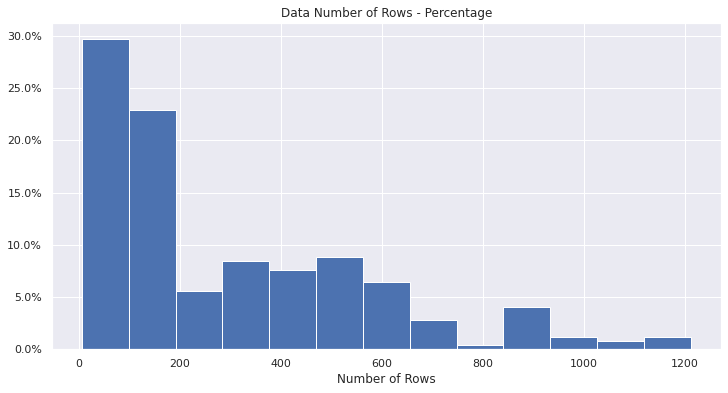

In [3]:
sns.set()
data = files_nr["df_nr"]
w = 100
n = math.ceil((max(data) - min(data)) / w)
plt.figure(figsize=(12,6))
plt.title("Data Number of Rows - Percentage")
plt.xlabel("Number of Rows")
plt.hist(data, bins=n, weights=np.ones(len(data)) / len(data), label='a')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.savefig('fig/data_number_rows_histogram.png', dpi=300)
plt.show()

In [4]:
print('Mean:', np.mean(data))
print('Median:', np.median(data))
print('Std Dev:', np.std(data))

Mean: 298.5983935742972
Median: 169.0
Std Dev: 274.5978574034985


In [5]:
def filter_files_by_n_rows(path:str, files:list, n_rows:int):
    filtered_files = {
        "file": [],
        "n_rows": []
    }
    
    for file in files:
        try:
            df = pd.read_csv(path+file)
            if(df.shape[0]>=n_rows):
                filtered_files["file"].append(file)
                filtered_files["n_rows"].append(df.shape[0])
        except:
            print('Something wrong reading data', file)
    return filtered_files

In [6]:
filtered_files = filter_files_by_n_rows(path=path, files=files, n_rows=365) #filtering by 1 year
print('Total files:', len(files))
print('Number of files filtered:', len(filtered_files["file"]))
print('Percentage of analysis', 100*len(filtered_files["file"])/len(files))
print('File with minimum rows:', min(filtered_files["n_rows"]))
print('File with maximum rows:', max(filtered_files["n_rows"]))

Something wrong reading data .ipynb_checkpoints
Total files: 250
Number of files filtered: 85
Percentage of analysis 34.0
File with minimum rows: 371
File with maximum rows: 1211


In [7]:
def save_filtered_files(filtered_files):
    for filtered_file in filtered_files["file"]:
        df = pd.read_csv(path+filtered_file)
        df.to_csv('data/filtered_crypto_usdt/{}'.format(filtered_file))

save_filtered_files(filtered_files=filtered_files)

In [8]:
print('All Columns Available:', list(df.columns))

All Columns Available: ['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore', 'date_open_time', 'date_close_time']
